<a href="https://colab.research.google.com/github/Adityab270900/Assesment-1/blob/main/RAG_Impementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: Lets implement a Simple RAG on any easily accessible Huggings face tranformer

!pip install transformers sentence-transformers faiss-cpu

from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import faiss

# Sample documents
documents = [
    "Holika Dahan is an ancient Hindu festival celebrating the victory of good over evil.",
    "The festival involves bonfires, symbolizing the burning of Holika, a demoness.",
    "However, modern Holika Dahan contributes to air pollution due to excessive burning.",
    "Scientists suggest alternative eco-friendly ways to celebrate Holi without pollution."
]

# Create embeddings
model = SentenceTransformer('all-mpnet-base-v2')
doc_embeddings = model.encode(documents)

# Create a FAISS index
index = faiss.IndexFlatL2(doc_embeddings.shape[1])
index.add(doc_embeddings)

# Question answering pipeline
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

def rag_pipeline(query):
  query_embedding = model.encode(query)
  D, I = index.search(query_embedding.reshape(1, -1), k=2) # Search for top 2 relevant documents

  context = ""
  for i in I[0]:
    context += documents[i] + " "

  result = qa_pipeline(question=query, context=context)
  return result

# Example usage
query = "Does Holika Dahan cause pollution?"
answer = rag_pipeline(query)
print(f"Query: {query}")
print(f"Answer: {answer['answer']}")

Device set to use cpu


Query: Does Holika Dahan cause pollution?
Answer: contributes to air pollution due to excessive burning


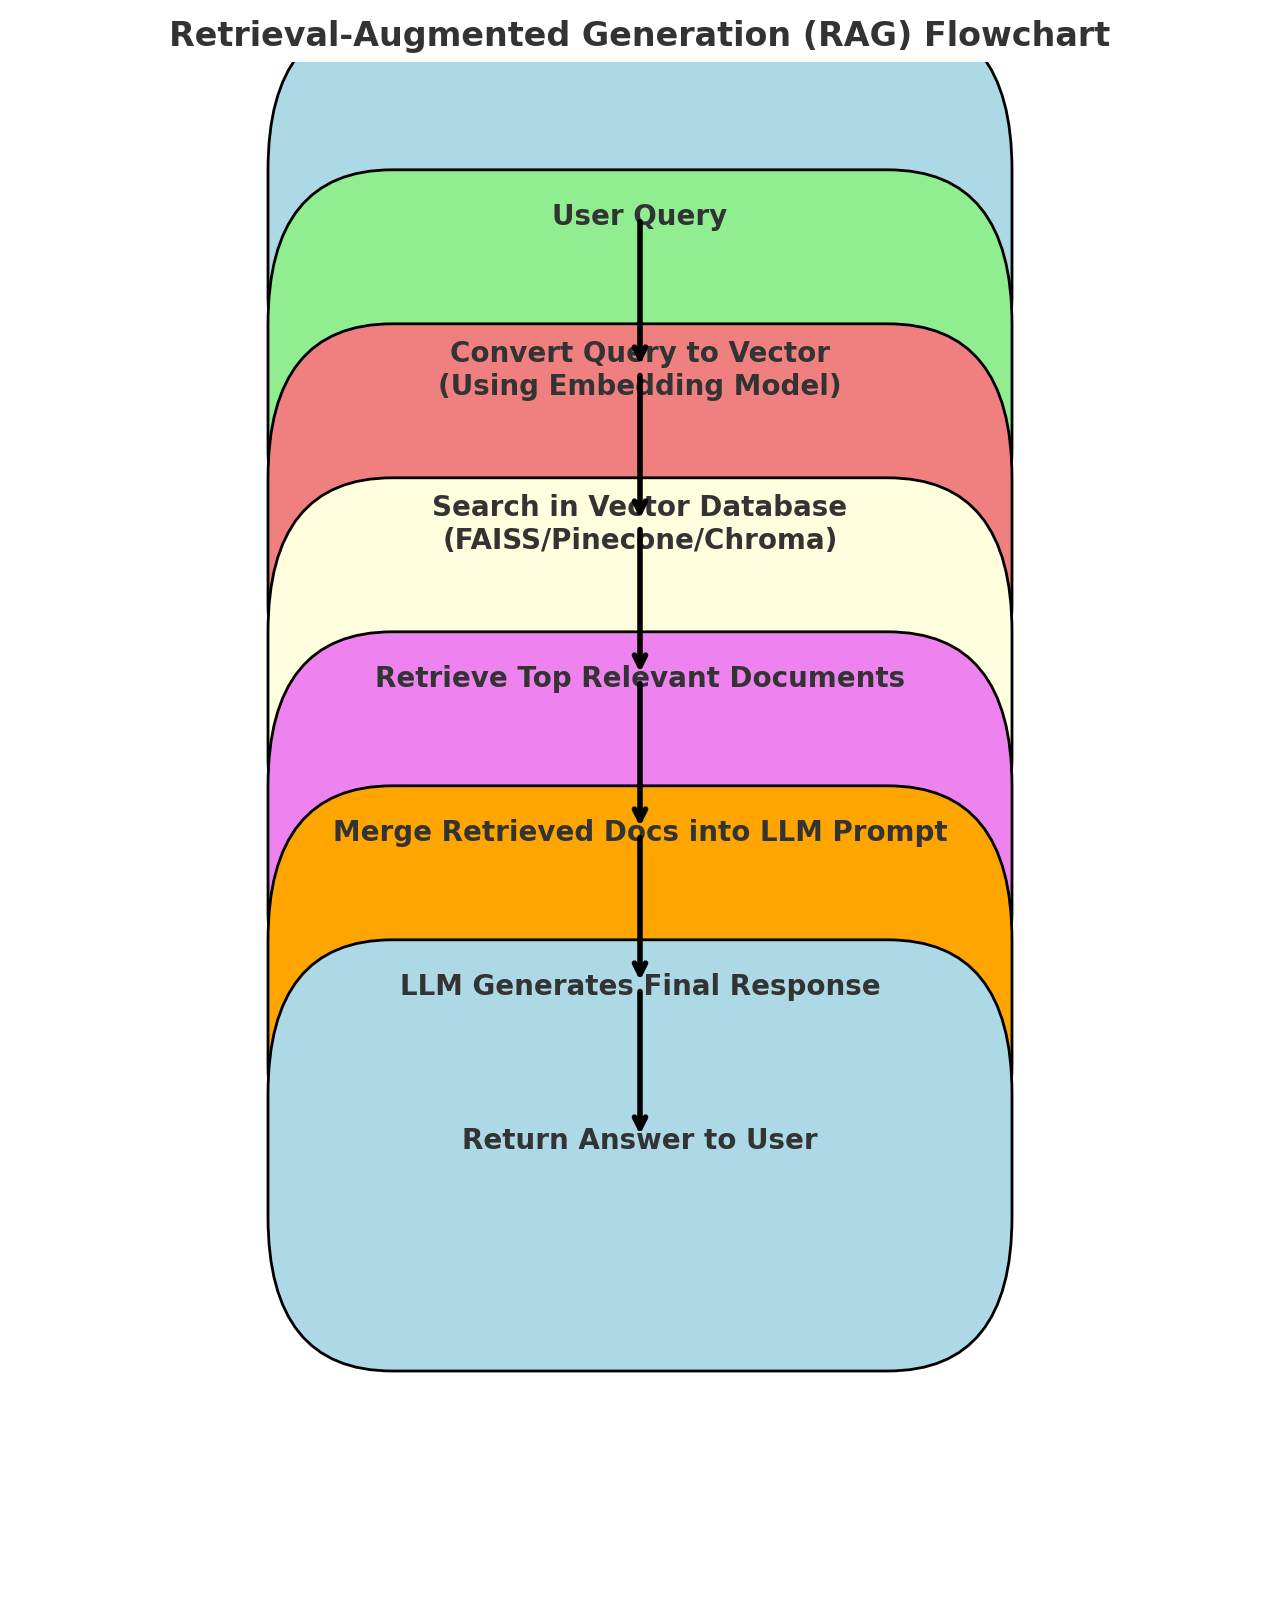